<h1>Анализ клиентских данных магазина</h1>

<h2>Первый проект на Jupiter Notebook</h2>

### Задачи в рамках проекта
* Для анализа дан магазин с 200 покупателями. Данные получены из банка открытых датасетов [Kaggle](https://www.kaggle.com/datasets)
* Существует выгрузка в виде CSV, которую нужно распарсить с помощью Python и статистически проанализировать.
* Посчитать средний возраст и доход клиентов магазина.
* Построить точечный график распределения дохода в зависимости от покупательского балла.
* Построить столбчатую диаграмму среднего дохода покупателей по возрастам.

В первую очередь, понимаем, какие библиотеки нам понадобятся в работе. Это Pandas для загрузки и обработки датасета и Matplotlib для отрисовки графиков.

In [52]:
import pandas as pd 
import matplotlib.pyplot as plt

## Статистические расчеты

Выгрузим таблицу с помощью библиотеки **Pandas.**

Выведем содержимое таблицы с клиентскими данными в интерфейс *Jupiter Notebook.*

In [53]:
data = pd.read_csv('Mall_Customers.csv')
data.head(200)

,CustomerID,Genre,Age,Annual_Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


Считаем колонку **CustomerID** как индекс первого столбца и установим его ключом. Убедимся, что первая колонка-индекс пропала

In [54]:
data.set_index('CustomerID', inplace=True) 
data.head(200)

,Genre,Age,Annual_Income,Spending_Score
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
...,...,...,...,...
196,Female,35,120,79
197,Female,45,126,28
198,Male,32,126,74


Считаем статистики по датасету: *средние, отклонения, экстремумы, процентили.*

Воспользуемся стандартыми возможностями функции Python **desсribe()**

Для расчета средней была использована следующая формула:

\begin{equation*}
\frac{\sum x_i}{n}
\end{equation*}

Для расчета отклонения была использована формула дисперсии:

<img src='https://smart-lab.ru/uploads/images/00/00/16/2012/09/16/7273a8.png'>

In [55]:
data.describe()

,Age,Annual_Income,Spending_Score
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


**Вывод:** средний возраст покупателей - *38.85 лет*, средний годовой доход покупателей - *60 560 $ в год*

Сделаем рассчет суммы и количества повторений годового дохода по возрастным группам.

Соберем новую таблицу с тремя колонками: возраст (age), суммарный годовой доход (sum), число лиц в возрастной группе (count), средний годовой доход (mean)

In [56]:
df = data.groupby(['Age'])['Annual_Income'].agg(['sum', 'count', 'mean'])
df.head(200)

,sum,count,mean
Age,,,
18,205,4,51.250000
19,456,8,57.000000
20,208,5,41.600000
21,194,5,38.800000
22,94,3,31.333333
23,249,6,41.500000
24,157,4,39.250000
25,173,3,57.666667
26,116,2,58.000000


## Визуализация результатов

Рисуем график распределения возраста по бонусной шкале

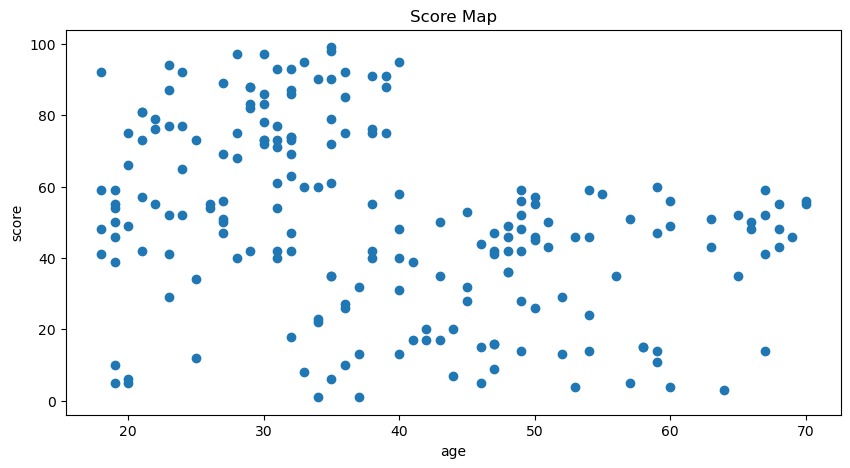

In [57]:
plt.figure(figsize = (10,5))
x = data.Age
y = data.Spending_Score
plt.scatter(x,y)
plt.xlabel("age")
plt.ylabel("score")
plt.title("Score Map")
plt.show()

**Вывод:** чем старше по возрасту покупатель, тем ниже его покупательский балл. Это объясняет большую лояльность молодого поколения к различным промоакциям и стремление участвовать в программах скидок, кэшбэков, накопления бонусных валют для последующих покупок.

Теперь нарисуем столбчатую диаграмму.

Назовем ее *Income Bar Chart*, добавим легенду, назовем горизонтальную ось *AGE*, вертикальную ось - *Average Annual Income*

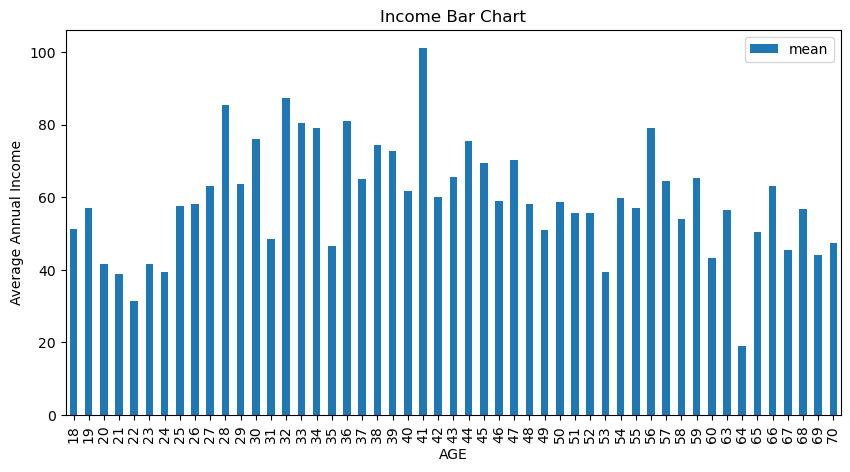

In [58]:
data.groupby(['Age'])['Annual_Income'].agg(['mean']).plot(kind='bar', figsize=(10,5))
plt.xlabel("AGE")
plt.ylabel("Average Annual Income")
plt.title("Income Bar Chart")
plt.show()

**Вывод**: покупатели среднего возраста имеют доход выше, чем более молодые или пристарелые покупатели.

### Конец первого проекта с использованием Jupiter Notebook
### Поздравляю!